This is a dataset from the mavenanalytics.io website that is based on video game sales from North America, Japan, EU, Africa, and the rest of the world for over 64,000 titles released from 1971 through 2024. The information in this dataset includes information such as critic's score, genre, console, and more. 

In this project, I will be utilizing Python and the numpy, pandas, matpotlib, and seaborn libraries to analyze and answer questions related to the dataset. 

Recommended Analysis:
1. Which titles sold the most worldwide?
2. Which year had the highest sales?
3. Has the industry grown over time?
4. Do any consoles seem to specialize in a particular genre?

DataFrame Dictionary:

'total_sales' = Global sales of copies in millions.

'na_sales' = North America sales of copies in millions.

'jp_sales' = Japanese sales of copies in millions.

'pal_sales' = European & African sales of copies in millions.

'other_sales' = Rest of world sales of copies in millions.

Before I begin my analysis, I will import the neccessary libraries needed for analysis:
1. Numpy for numerical analysis.
2. Pandas for data importing and data manipulation.
3. Matplotlib and Seaborn for data visualizations.

In [1]:
import numpy as np
import pandas as pd 
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use("ggplot")
import seaborn as sns
sns.set_style("darkgrid")

Now that I have those libraries imported, I will now utilize pandas library to import the dataset that will be used for analysis into a pandas dataframe.

In [2]:
game_sales = pd.read_csv(r"C:\Users\mjaso\Downloads\Video+Game+Sales\video_game_sales_.csv")

DATA CLEANING

I can now check the first and last 5 rows of this dataframe to check for consistency and make sure there are no errors.

In [3]:
game_sales.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [4]:
game_sales.tail()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24
64015,/games/boxart/default.jpg,Yurukill: The Calumniation Games,PS4,Visual Novel,Unknown,G.rev Ltd.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-29


It looks like all of the data imported is consistent, I will now check the size of this dataframe.

In [5]:
rows = game_sales.shape[0]
columns = game_sales.shape[1]
print(f"There are {rows} rows, and {columns} columns of data in this dataframe.") 

There are 64016 rows, and 14 columns of data in this dataframe.


Now I will check to make sure all of the datatypes have been imported in the correct format.

In [6]:
game_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


While majority of the columns are in a usable format, I will have to convert the 'release_date' and 'last_update' columns to get them in the correct date formats.

In [7]:
game_sales["release_date"] = pd.to_datetime(game_sales["release_date"])
game_sales["last_update"] = pd.to_datetime(game_sales["last_update"])

The columns have been converted to the proper format, now I will recheck the datatypes to verify.

In [8]:
game_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   img           64016 non-null  object        
 1   title         64016 non-null  object        
 2   console       64016 non-null  object        
 3   genre         64016 non-null  object        
 4   publisher     64016 non-null  object        
 5   developer     63999 non-null  object        
 6   critic_score  6678 non-null   float64       
 7   total_sales   18922 non-null  float64       
 8   na_sales      12637 non-null  float64       
 9   jp_sales      6726 non-null   float64       
 10  pal_sales     12824 non-null  float64       
 11  other_sales   15128 non-null  float64       
 12  release_date  56965 non-null  datetime64[ns]
 13  last_update   17879 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(6), object(6)
memory usage: 6.8+ MB


I can now see the targeted columns are reflecting the proper datatypes.

Now I will check the number of unique values in each column. This will provide me with a bit more understanding of the dataframe.

In [9]:
for uni in game_sales.columns:
    uni_vals = game_sales[uni].nunique()
    print(f"The column {uni} has {uni_vals} unique values.") 

The column img has 56177 unique values.
The column title has 39798 unique values.
The column console has 81 unique values.
The column genre has 20 unique values.
The column publisher has 3383 unique values.
The column developer has 8862 unique values.
The column critic_score has 89 unique values.
The column total_sales has 482 unique values.
The column na_sales has 320 unique values.
The column jp_sales has 121 unique values.
The column pal_sales has 256 unique values.
The column other_sales has 133 unique values.
The column release_date has 7922 unique values.
The column last_update has 1545 unique values.


Now I want to view the number of Null values per column.

In [10]:
for na in game_sales.columns:
    na_vals = game_sales[na].isna().sum()
    print(f"There are {na_vals} N/A's in the column {na}.") 

There are 0 N/A's in the column img.
There are 0 N/A's in the column title.
There are 0 N/A's in the column console.
There are 0 N/A's in the column genre.
There are 0 N/A's in the column publisher.
There are 17 N/A's in the column developer.
There are 57338 N/A's in the column critic_score.
There are 45094 N/A's in the column total_sales.
There are 51379 N/A's in the column na_sales.
There are 57290 N/A's in the column jp_sales.
There are 51192 N/A's in the column pal_sales.
There are 48888 N/A's in the column other_sales.
There are 7051 N/A's in the column release_date.
There are 46137 N/A's in the column last_update.


There are quite a few columns that have a significant amount of N/A values. However, for the questions that are required for this project, there may be no need to worry about them. In the chance that I need to deal with the N/A values, I have the option of replacing values with median or mean values, or removing the N/A values completly from the dataframe. (Which is not ideal in this situation given the fact that some columns have a high number of N/A values which would result in more than half of the dataframe being removed.)

Now I will look at the numerical columns to get a understanding of those statistical values.

In [11]:
game_sales.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


I will also look at the categorical columns to get an idea of those statistical values.

In [12]:
game_sales.describe(include= "object")

,img,title,console,genre,publisher,developer
count,64016,64016,64016,64016,64016,63999
unique,56177,39798,81,20,3383,8862
top,/games/boxart/default.jpg,Plants vs. Zombies,PC,Misc,Unknown,Unknown
freq,7810,17,12617,9304,8842,4435


Now that I have completed importing, cleaning, and exploring this dataframe, I will now move on to answering the questions associated with this project.

1) Which titles sold the most worldwide?

In [13]:
top_10_worldwide_titles = game_sales.groupby("title").agg(world_wide_sales = ("total_sales", "sum")).sort_values(by= "world_wide_sales", ascending=False)[:10]
top_10_worldwide_titles
def highlight_max_min(row):
    max_value = row["world_wide_sales"].max()
    min_value = row["world_wide_sales"].min()
    return ["background-color: green" if val == max_value
            else "background-color: red" if val == min_value
            else " " for val in row]

top_10_worldwide_titles.style.highlight_max(subset=pd.IndexSlice[:, ["world_wide_sales"]], color="green") \
                         .highlight_min(subset=pd.IndexSlice[:, ["world_wide_sales"]], color="red")

,world_wide_sales
title,
Grand Theft Auto V,64.290000
Call of Duty: Black Ops,30.990000
Call of Duty: Modern Warfare 3,30.710000
Call of Duty: Black Ops II,29.590000
Call of Duty: Ghosts,28.800000
Call of Duty: Black Ops 3,26.720000
Call of Duty: Modern Warfare 2,25.020000
Minecraft,24.010000
Grand Theft Auto IV,22.530000


The above list is the top 10 selling titles worldwide, with Grand Theft Auto V being the number one selling title.

Now I will visualize this data with a bar graph.

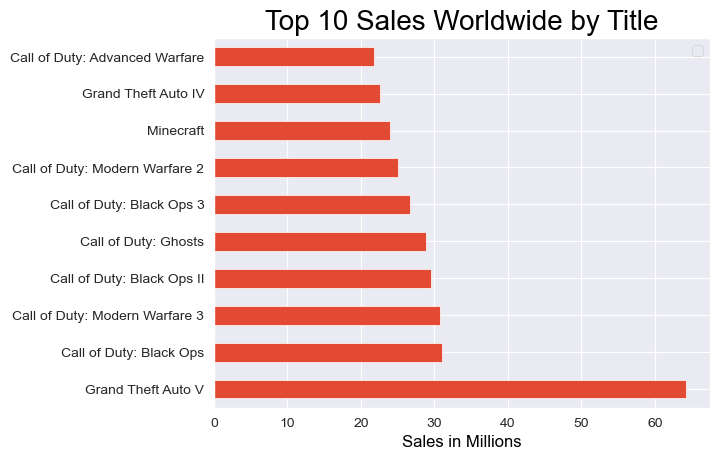

In [14]:
game_sales.groupby("title").agg(world_wide_sales = ("total_sales", "sum")).sort_values(by= "world_wide_sales", ascending=False)[:10].plot(kind="barh")
plt.title("Top 10 Sales Worldwide by Title",
          color="black",
          fontsize=20)
plt.legend("")
plt.ylabel("") 
sales = list(range(0, 70, 10))
plt.xlabel("Sales in Millions",
           color="black") 
print("") 

2. Which year had the highest sales?

In order to answer this question, I will need to create a 'release_year' column with the year value from the 'release_date' column. While I'm at it, I will also create a 'release_month' column with the month value from the 'release_date' column also. It can possibly be useful to further my analysis later on.

In [15]:
game_sales["release_year"] = game_sales["release_date"].dt.year
game_sales["release_month"] = game_sales["release_date"].dt.month

Now the two new columns have been added to the dataframe, and I will run a quick check to verify.

In [16]:
game_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   img            64016 non-null  object        
 1   title          64016 non-null  object        
 2   console        64016 non-null  object        
 3   genre          64016 non-null  object        
 4   publisher      64016 non-null  object        
 5   developer      63999 non-null  object        
 6   critic_score   6678 non-null   float64       
 7   total_sales    18922 non-null  float64       
 8   na_sales       12637 non-null  float64       
 9   jp_sales       6726 non-null   float64       
 10  pal_sales      12824 non-null  float64       
 11  other_sales    15128 non-null  float64       
 12  release_date   56965 non-null  datetime64[ns]
 13  last_update    17879 non-null  datetime64[ns]
 14  release_year   56965 non-null  float64       
 15  release_month  5696

I can now see the 'release_year' and 'release_month' columns are added and can continue on answering question number 2.

In [17]:
top_10_years_highest_sales = game_sales.groupby("release_year")["total_sales"].sum().sort_values(ascending=False).reset_index("release_year")[:10].set_index("release_year") 
top_10_years_highest_sales

,total_sales
release_year,
2008.0,538.11
2009.0,495.36
2010.0,454.02
2011.0,440.32
2007.0,436.39
2002.0,314.50
2005.0,313.48
2003.0,300.89
2014.0,292.11


Above is a table displaying the top 10 years with the highest amount of sales.

I will view this data in a line graph as well to see the trends over the years.

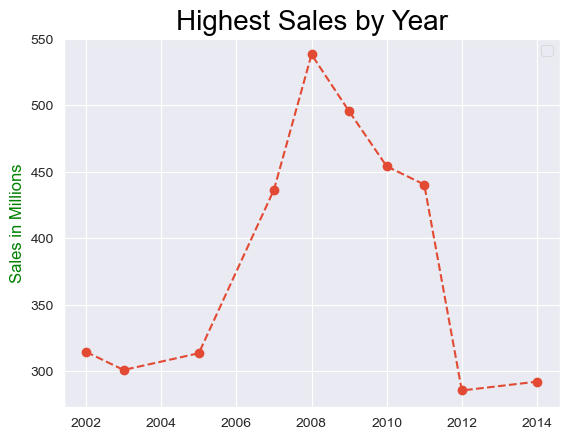

In [18]:
top_10_years_highest_sales_graph = top_10_years_highest_sales.sort_values(by="release_year", ascending=True)
top_10_years_highest_sales_graph.plot(kind="line",
                                      linestyle="--", 
                                      marker="o",
                                      label="line with marker") 
plt.title("Highest Sales by Year",
          color="black",
          fontsize=20)
plt.ylabel("Sales in Millions",
           color="green") 
plt.xlabel("") 
plt.legend("") 
print("") 

3. Has the industry grown over time?

In [19]:
industry_growth_over_time = game_sales.groupby("release_year")["total_sales"].sum().reset_index("release_year") 
industry_growth_over_time

,release_year,total_sales
0,1971.0,0.00
1,1973.0,0.00
2,1975.0,0.00
3,1977.0,2.50
4,1978.0,2.36
5,1979.0,0.31
6,1980.0,2.26
7,1981.0,7.73
8,1982.0,28.99
9,1983.0,22.68


The above table shows the total sales within the industry for each year. 

I will visualize this data in a scatter plot to represent the industries growth over time.

The data indicates that on a global level, sales were steady until 1995 and in 1996 sales started to climb. Globally, sales began to drop off around 2011.


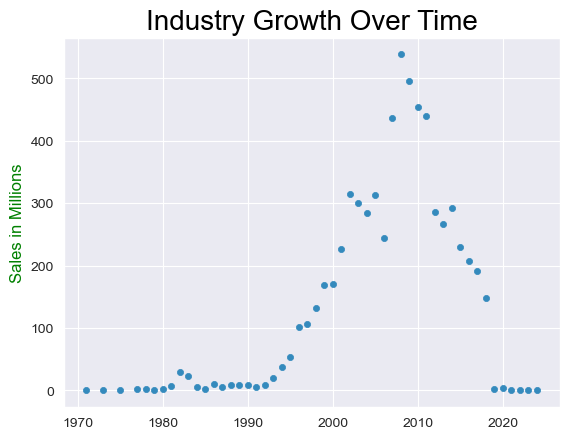

In [20]:
industry_growth_over_time.plot(kind="scatter",
                               x="release_year",
                               y="total_sales")
plt.title("Industry Growth Over Time",
          color="black",
          fontsize=20)
plt.ylabel("Sales in Millions", 
           color="green")
plt.xlabel("") 
print(f"The data indicates that on a global level, sales were steady until 1995 and in 1996 sales started to climb. Globally, sales began to drop off around 2011.")

Now I will create tables for each individual region, to get an idea of how they have experienced growth over time.

In [21]:
na_growth_over_time = game_sales.groupby("release_year")["na_sales"].sum().reset_index()
na_growth_over_time

,release_year,na_sales
0,1971.0,0.00
1,1973.0,0.00
2,1975.0,0.00
3,1977.0,2.34
4,1978.0,2.20
5,1979.0,0.29
6,1980.0,2.11
7,1981.0,7.21
8,1982.0,27.06
9,1983.0,21.15


In [22]:
jp_growth_over_time = game_sales.groupby("release_year")["jp_sales"].sum().reset_index()
jp_growth_over_time

,release_year,jp_sales
0,1971.0,0.00
1,1973.0,0.00
2,1975.0,0.00
3,1977.0,0.00
4,1978.0,0.00
5,1979.0,0.00
6,1980.0,0.00
7,1981.0,0.00
8,1982.0,0.00
9,1983.0,0.00


In [23]:
pal_growth_over_time = game_sales.groupby("release_year")["pal_sales"].sum().reset_index()
pal_growth_over_time

,release_year,pal_sales
0,1971.0,0.00
1,1973.0,0.00
2,1975.0,0.00
3,1977.0,0.14
4,1978.0,0.14
5,1979.0,0.02
6,1980.0,0.13
7,1981.0,0.45
8,1982.0,1.60
9,1983.0,1.29


In [24]:
other_growth_over_time = game_sales.groupby("release_year")["other_sales"].sum().reset_index()
other_growth_over_time

,release_year,other_sales
0,1971.0,0.00
1,1973.0,0.00
2,1975.0,0.00
3,1977.0,0.02
4,1978.0,0.00
5,1979.0,0.00
6,1980.0,0.02
7,1981.0,0.08
8,1982.0,0.26
9,1983.0,0.24


Lets compare the regions by visualizing the above tables in a scatter plot.

Below displays the growth over time in sales for the different regions of the world.


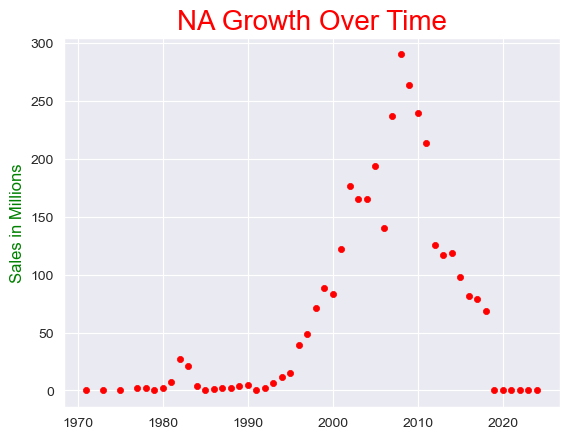

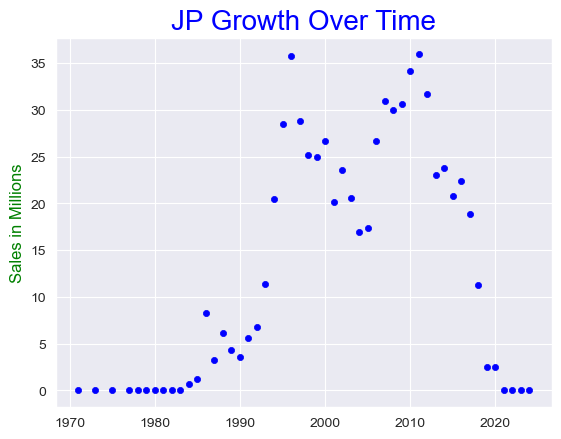

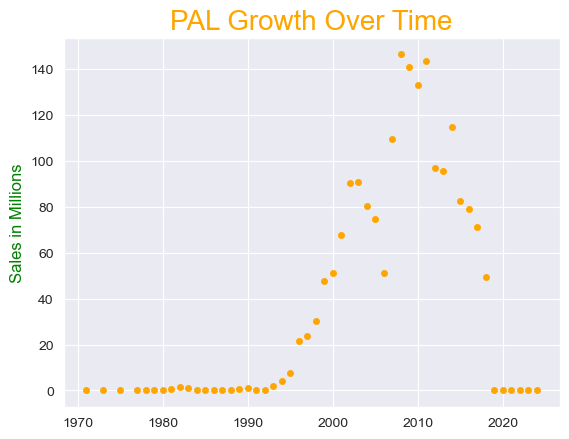

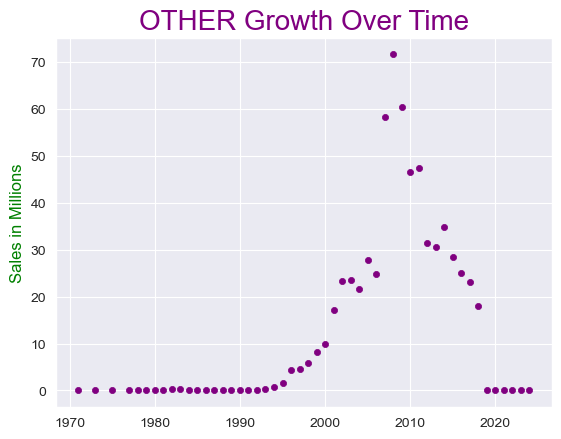

In [25]:
na_growth_over_time.plot(kind="scatter", x="release_year", y="na_sales", color="red") 
plt.title("NA Growth Over Time",
          color="red",
          fontsize=20)
plt.ylabel("Sales in Millions",
           color="green")
plt.xlabel("") 
jp_growth_over_time.plot(kind="scatter", x="release_year", y="jp_sales", color="blue") 
plt.title("JP Growth Over Time",
          color="blue",
          fontsize=20)
plt.ylabel("Sales in Millions",
           color="green")
plt.xlabel("") 
pal_growth_over_time.plot(kind="scatter", x="release_year", y="pal_sales", color="orange")
plt.title("PAL Growth Over Time",
          color="orange",
          fontsize=20)
plt.ylabel("Sales in Millions", 
           color="green")
plt.xlabel("") 
other_growth_over_time.plot(kind="scatter", x="release_year", y="other_sales", color="purple") 
plt.title("OTHER Growth Over Time",
          color="purple",
          fontsize=20)
plt.ylabel("Sales in Millions", 
           color="green") 
plt.xlabel("") 
print("Below displays the growth over time in sales for the different regions of the world.") 

4. Do any consoles seem to specialize in a particular genre?

In [26]:
console_genre = game_sales.groupby(["console", "genre"])[["console","genre"]].value_counts().reset_index()
console_genre
top_genre_per_console = console_genre.loc[[0,15,30,42,50,58,75,81,84,86,107,116,127,132,136,137,141,144,147,148,152,164,179,192,197,
                                           206,207,209,221,235,254,266,272,282,299,306,317,331,343,347,352,366,373,382,399,401,423,
                                           430,437,450,456,482,489,501,526,534,546,567,584,601,615,631,635,644,666,669,681,688,695,
                                           701,716,726,738,755,768,775,806,818,822,843,861,871,882]]
top_genre_per_console.reset_index()
top_genre_per_console

,console,genre,0
0,2600,Action,302
15,3DO,Misc,88
30,3DS,Misc,382
42,5200,Action,26
50,7800,Action,21
58,ACPC,Action,6
75,AJ,Shooter,14
81,AST,Misc,11
84,Aco,Misc,1
86,All,Action-Adventure,213


The above table displays the consoles and the amount of the top selling genres per console.




This concludes the analysis of this project. I have successfully demonstrated how to use the pandas library to import a csv file into a dataframe as well as manipulate that dataframe. I have been able to demonstrate how to use the library numpy for numerical calculations, as well as matplotlib.pyplot for constructing an assortment of different graphs to visualize the data.